In [2]:
import pandas as pd

In [3]:
# Import Safety Performance Function data (calculated for each segment)
data = pd.read_excel("../Data/SPF_data.xlsx")
data.head()

,seg,Y,X1,X2,X3
0,59,49,4.344300,8076.666667,0.920747
1,58,44,9.025771,8076.666667,0.997145
2,57,35,9.401453,8076.666667,0.744566
3,56,1,0.685524,8076.666667,0.000000
4,55,5,1.494137,8076.666667,0.669283


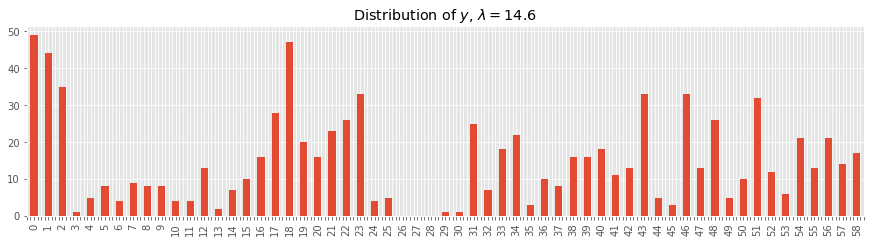

In [8]:
# Visualize no. of observed accidents in each segment
import matplotlib.pyplot as plt

plt.style.use('ggplot')

m = data['Y'].mean()
s = data['Y'].sort_index()
ax = s.plot(kind='bar', figsize=(15, 3.5), title=rf'Distribution of $y$, $\lambda={m:.1f}$')
_ = ax.xaxis.set_major_locator(plt.MaxNLocator(250))

In [9]:
import statsmodels.api as sm

In [10]:
# Fit Negative Bionomial distribution on SPF data
# With default arguments
X = data[['X1', 'X2', 'X3']]
Y = data['Y']
model_1 = sm.NegativeBinomial(Y,X).fit()
print(model_1.summary())

c:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:861: RuntimeWarning: overflow encountered in exp
  return np.exp(linpred) # not cdf
c:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2642: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
c:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2733: RuntimeWarning: invalid value encountered in multiply
  dparams = exog*a1 * (y-mu)/(mu+a1)
c:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2733: RuntimeWarning: invalid value encountered in true_divide
  dparams = exog*a1 * (y-mu)/(mu+a1)
c:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2736: RuntimeWarning: invalid value encountered in true_divide
  - np.log(a1+mu) - (y-mu)/(a1+mu)).sum() * da1
c:\Users\S

         Current function value: 3.666553
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3
                     NegativeBinomial Regression Results                      
Dep. Variable:                      Y   No. Observations:                   59
Model:               NegativeBinomial   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 Aug 2022   Pseudo R-squ.:                0.008023
Time:                        17:51:15   Log-Likelihood:                -216.33
converged:                      False   LL-Null:                       -218.08
Covariance Type:            nonrobust   LLR p-value:                    0.1739
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.2174        nan        nan        nan         nan         nan

c:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
# Fit Negative Bionomial distribution on SPF data
# Trying different arguments for the fit function
data = pd.read_excel("../Data/SPF_data.xlsx")
X = data[['X1', 'X2', 'X3']]
Y = data['Y']
model_2 = sm.NegativeBinomial(Y,X).fit(method='nm', maxiter=1000)
print(model_2.summary())

Optimization terminated successfully.
         Current function value: 3.400313
         Iterations: 131
         Function evaluations: 230
                     NegativeBinomial Regression Results                      
Dep. Variable:                      Y   No. Observations:                   59
Model:               NegativeBinomial   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 Aug 2022   Pseudo R-squ.:                 0.08005
Time:                        17:53:36   Log-Likelihood:                -200.62
converged:                       True   LL-Null:                       -218.08
Covariance Type:            nonrobust   LLR p-value:                 2.619e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.2480      0.037      6.697      0.000       0.175    

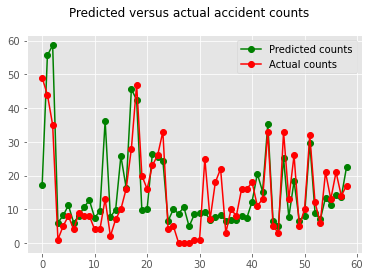

In [12]:
# Plotting Residuals for model_2 
nb_predictions = model_2.predict(X)
actual_counts = Y
fig = plt.figure()
fig.suptitle('Predicted versus actual accident counts')
predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [13]:
# Fit Negative Bionomial distribution on SPF data
# Trying different arguments for the fit function
data = pd.read_excel("../Data/SPF_data.xlsx")
X = data[['X1', 'X2', 'X3']]
Y = data['Y']
model_3 = sm.NegativeBinomial(Y,X).fit(method='newton', maxiter=1000)
print(model_3.summary())

Optimization terminated successfully.
         Current function value: 3.400313
         Iterations 5
                     NegativeBinomial Regression Results                      
Dep. Variable:                      Y   No. Observations:                   59
Model:               NegativeBinomial   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 Aug 2022   Pseudo R-squ.:                 0.08005
Time:                        17:59:58   Log-Likelihood:                -200.62
converged:                       True   LL-Null:                       -218.08
Covariance Type:            nonrobust   LLR p-value:                 2.619e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.2480      0.037      6.697      0.000       0.175       0.321
X2             0.0002   3.04e

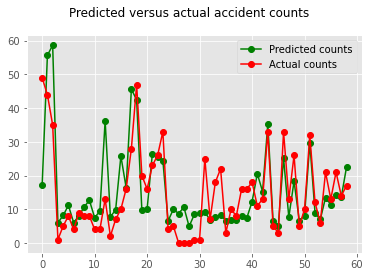

In [14]:
# Plotting Residuals for model_3
nb_predictions = model_3.predict(X)
actual_counts = Y
fig = plt.figure()
fig.suptitle('Predicted versus actual accident counts')
predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [21]:
# Scale SPF data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
# Fit Negative Bionomial distribution on scaled SPF data
# Default arguments for fit func.
data = pd.read_excel("../Data/SPF_data.xlsx")
X = data[['X1', 'X2', 'X3']]
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
X.sort_index(inplace=True)
Y = data['Y']
model_4 = sm.NegativeBinomial(Y,X).fit()
print(model_4.summary())

Optimization terminated successfully.
         Current function value: 602.838889
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
                     NegativeBinomial Regression Results                      
Dep. Variable:                      Y   No. Observations:                   59
Model:               NegativeBinomial   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 Aug 2022   Pseudo R-squ.:                  -162.1
Time:                        18:10:17   Log-Likelihood:                -35567.
converged:                       True   LL-Null:                       -218.08
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             1.8460        nan       

c:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2871: RuntimeWarning: invalid value encountered in true_divide
  dada = (da2 * dalpha/da1 + da1**2 * (special.polygamma(1, a1+y) -
c:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2871: RuntimeWarning: invalid value encountered in subtract
  dada = (da2 * dalpha/da1 + da1**2 * (special.polygamma(1, a1+y) -
c:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2871: RuntimeWarning: invalid value encountered in multiply
  dada = (da2 * dalpha/da1 + da1**2 * (special.polygamma(1, a1+y) -
c:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


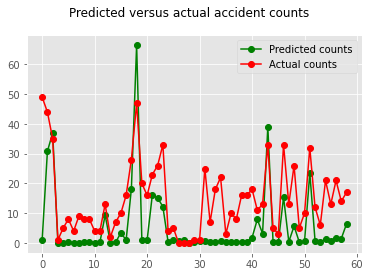

In [31]:
# Plotting Residuals for model_4
nb_predictions = model_4.predict(X)
actual_counts = Y
fig = plt.figure()
fig.suptitle('Predicted versus actual accident counts')
predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [32]:
# Fit Negative Bionomial distribution on scaled SPF data
# Trying different arguments for fit func.
data = pd.read_excel("../Data/SPF_data.xlsx")
X = data[['X1', 'X2', 'X3']]
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
X.sort_index(inplace=True)
Y = data['Y']
model_5 = sm.NegativeBinomial(Y,X).fit(method='nm', maxiter=1000)
print(model_5.summary())

Optimization terminated successfully.
         Current function value: 5.545294
         Iterations: 273
         Function evaluations: 462
                     NegativeBinomial Regression Results                      
Dep. Variable:                      Y   No. Observations:                   59
Model:               NegativeBinomial   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 Aug 2022   Pseudo R-squ.:                 -0.5003
Time:                        18:11:21   Log-Likelihood:                -327.17
converged:                       True   LL-Null:                       -218.08
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.7112      0.153      4.655      0.000       0.412    

c:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2642: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
c:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2642: RuntimeWarning: invalid value encountered in multiply
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)


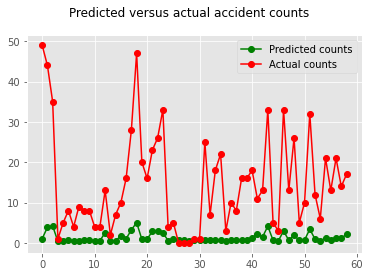

In [33]:
# Plotting Residuals for model_5
nb_predictions = model_5.predict(X)
actual_counts = Y
fig = plt.figure()
fig.suptitle('Predicted versus actual accident counts')
predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [34]:
# Fit Negative Bionomial distribution on scaled SPF data
# Trying different arguments for fit func.
data = pd.read_excel("../Data/SPF_data.xlsx")
X = data[['X1', 'X2', 'X3']]
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
X.sort_index(inplace=True)
Y = data['Y']
model_6 = sm.NegativeBinomial(Y,X).fit(method='bfgs', maxiter=1000)
print(model_6.summary())

Optimization terminated successfully.
         Current function value: 602.838889
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
                     NegativeBinomial Regression Results                      
Dep. Variable:                      Y   No. Observations:                   59
Model:               NegativeBinomial   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 Aug 2022   Pseudo R-squ.:                  -162.1
Time:                        18:11:37   Log-Likelihood:                -35567.
converged:                       True   LL-Null:                       -218.08
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             1.8460        nan       

c:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2871: RuntimeWarning: invalid value encountered in true_divide
  dada = (da2 * dalpha/da1 + da1**2 * (special.polygamma(1, a1+y) -
c:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2871: RuntimeWarning: invalid value encountered in subtract
  dada = (da2 * dalpha/da1 + da1**2 * (special.polygamma(1, a1+y) -
c:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2871: RuntimeWarning: invalid value encountered in multiply
  dada = (da2 * dalpha/da1 + da1**2 * (special.polygamma(1, a1+y) -
c:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


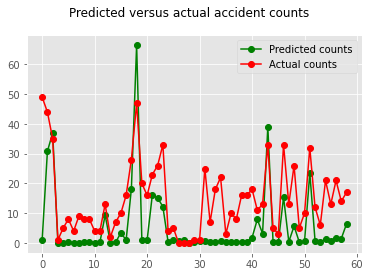

In [35]:
# Plotting Residuals for model_6
nb_predictions = model_6.predict(X)
actual_counts = Y
fig = plt.figure()
fig.suptitle('Predicted versus actual accident counts')
predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [36]:
# Fit Negative Bionomial distribution on scaled SPF data
# Trying different arguments for fit func.
data = pd.read_excel("../Data/SPF_data.xlsx")
X = data[['X1', 'X2', 'X3']]
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
X.sort_index(inplace=True)
Y = data['Y']
model_7 = sm.NegativeBinomial(Y,X).fit(method='newton', maxiter=1000)
print(model_7.summary())

         Current function value: 16.757788
         Iterations: 1000
                     NegativeBinomial Regression Results                      
Dep. Variable:                      Y   No. Observations:                   59
Model:               NegativeBinomial   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 Aug 2022   Pseudo R-squ.:                  -3.534
Time:                        18:13:28   Log-Likelihood:                -988.71
converged:                      False   LL-Null:                       -218.08
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.6627     90.668      0.007      0.994    -177.042     178.368
X2            -0.1444     83.540     -0.002      0.999    -163

c:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


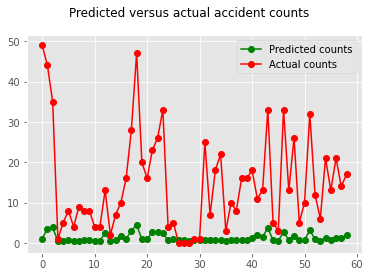

In [37]:
# Plotting Residuals for model_7
nb_predictions = model_7.predict(X)
actual_counts = Y
fig = plt.figure()
fig.suptitle('Predicted versus actual accident counts')
predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [39]:
print(model_1.summary())

                     NegativeBinomial Regression Results                      
Dep. Variable:                      Y   No. Observations:                   59
Model:               NegativeBinomial   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 Aug 2022   Pseudo R-squ.:                0.008023
Time:                        18:20:28   Log-Likelihood:                -216.33
converged:                      False   LL-Null:                       -218.08
Covariance Type:            nonrobust   LLR p-value:                    0.1739
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.2174        nan        nan        nan         nan         nan
X2             0.0002        nan        nan        nan         nan         nan
X3             0.1259        nan        nan        n

In [40]:
# Get model parameters
model_1.params

X1       0.217394
X2       0.000219
X3       0.125937
alpha    1.437058
dtype: float64